In [1]:
%matplotlib notebook

import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency

In [2]:
df = pd.DataFrame(np.array([np.load("MCCwES.npy"), np.load("MCCwoES.npy"), np.load("MCCoff.npy")]).T, 
                  index = [-2,-1,0,1,2], columns = ["MCCwES", "MCCwoES", "MCCoff"])
df

,MCCwES,MCCwoES,MCCoff
-2,12014,16429,54347
-1,474899,472903,454911
0,89842,85321,70373
1,409841,407527,380900
2,13404,17820,39469


In [3]:
def show_chi2(chi2):
    print("Chi2 test statistic: " + str(chi2[0]) + "\np-value: " + str(chi2[1]) + "\ndof: " + str(chi2[2]))

In [4]:
chi2 = chi2_contingency(df)
show_chi2(chi2)

Chi2 test statistic: 60114.65954421561
p-value: 0.0
dof: 8


In [35]:
for col in df.columns:
    new_df = df.drop(columns = col)
    chi2 = chi2_contingency(new_df)
    print(list(map(str, new_df.columns)))
    show_chi2(chi2)
    print()

['MCCwoES', 'MCCoff']
Chi2 test statistic: 31178.695009364103
p-value: 0.0
dof: 4

['MCCwES', 'MCCoff']
Chi2 test statistic: 43709.17049228823
p-value: 0.0
dof: 4

['MCCwES', 'MCCwoES']
Chi2 test statistic: 1437.3043242420288
p-value: 5.62929771312085e-310
dof: 4



In [36]:
df.iloc[1] = df.iloc[0] + df.iloc[1]
df.iloc[3] = df.iloc[3] + df.iloc[4]
df = df.drop(index = [-2,2])
df

,MCCwES,MCCwoES,MCCoff
-1,486913,489332,509258
0,89842,85321,70373
1,423245,425347,420369


In [37]:
chi2 = chi2_contingency(df)
show_chi2(chi2)

Chi2 test statistic: 3173.859064777347
p-value: 0.0
dof: 4


In [38]:
for col in df.columns:
    new_df = df.drop(columns = col)
    chi2 = chi2_contingency(new_df)
    print(list(map(str, new_df.columns)))
    show_chi2(chi2)
    print()

['MCCwoES', 'MCCoff']
Chi2 test statistic: 1862.0473973414
p-value: 0.0
dof: 2

['MCCwES', 'MCCoff']
Chi2 test statistic: 2876.856050045487
p-value: 0.0
dof: 2

['MCCwES', 'MCCwoES']
Chi2 test statistic: 127.88881345885949
p-value: 1.6954969342335452e-28
dof: 2



In [62]:
a1, a2, a3 = np.load("data/MCCES.npy"), np.load("data/MCCwoES.npy"), np.load("data/MCCoff.npy")

In [63]:
profits = [np.array(list(map(lambda x: x.dot([-2,-1,0,1,2]), a))) for a in [a1, a2, a3]]
rates = [np.array(list(map(lambda x: (x[0] + x[1] - x[3] - x[4]) / sum(x), a))) for a in [a1, a2, a3]]

In [64]:
def poly(ys, d):
    xs = np.arange(len(ys))
    poly = np.polyfit(xs, ys, d)
    exps = np.flip(np.arange(d+1))
    return list(map(lambda x: sum([coef * x ** exp for (coef, exp) in zip(poly, exps)]), xs))

In [71]:
from blackjack import BlackJack

In [83]:
def test_random_policy(epochs = 500_000):
    game = BlackJack()
    actions = ["hit", "stand", "double"]
    rewards = [0] * epochs
    
    for i in range(epochs):
    
        game.start()

        while game.player_hand_sum < 21: # while the player hasn't busted

            action = random.choice(actions)

            if action == "hit":
                game.hit()
            elif action == "stand":
                game.stand() # if we stand, the round ends
                break
            else:
                game.double() # if we double, the round ends because double = hit -> stand
                break

        # store reward
        rewards[i] = game.get_reward()
    return rewards

In [84]:
rewards = np.unique(test_random_policy(), return_counts = True)[1]
rewards

New BlackJack game created


array([132090, 199043,  23425, 100162,  45280], dtype=int64)

In [85]:
random_policy_profit = rewards.dot([-2,-1,0,1,2])
random_policy_rate = (rewards[0] + rewards[1] - rewards[3] - rewards[4]) / sum(rewards)
random_policy_profit, random_policy_rate

(-272501, 0.371382)

<IPython.core.display.Javascript object>


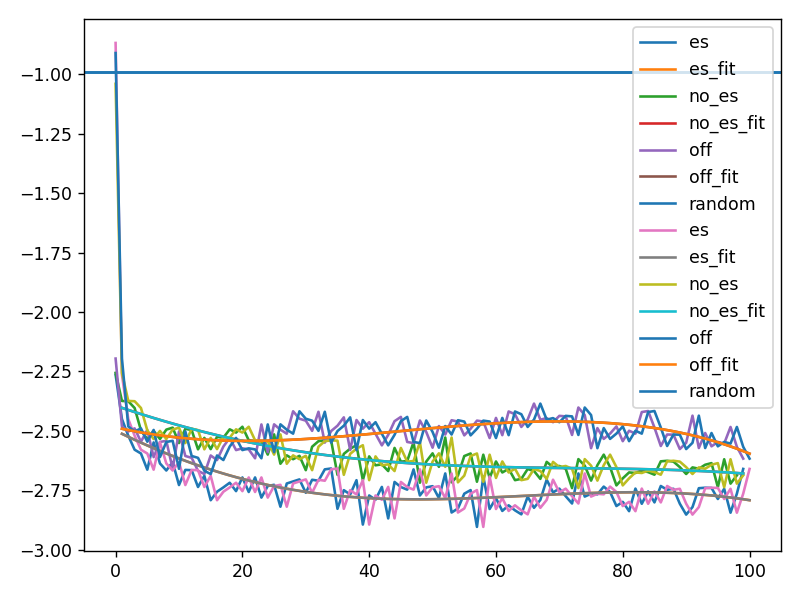

In [86]:
plt.plot(np.log(rates[0][1:]), label = "es")
plt.plot(np.arange(1, len(rates[0])), np.log(poly(rates[0][1:], 3)), label = "es_fit")

plt.plot(np.log(rates[1][1:]), label = "no_es")
plt.plot(np.arange(1, len(rates[1])), np.log(poly(rates[1][1:], 3)), label = "no_es_fit")

plt.plot(np.log(rates[2][1:]), label = "off")
plt.plot(np.arange(1, len(rates[2])), np.log(poly(rates[2][1:], 3)), label = "off_fit")

plt.axhline(np.log(random_policy_rate), label = "random")

plt.legend()
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


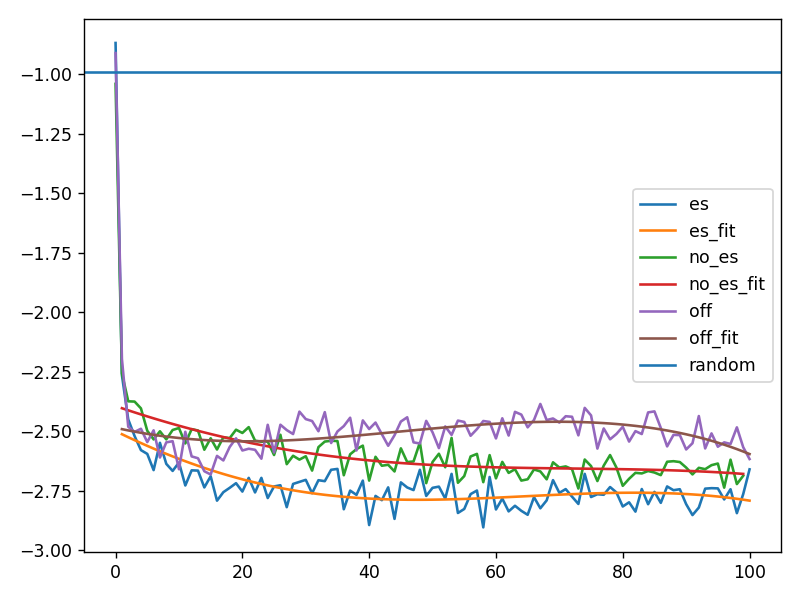

In [88]:
plt.plot(np.log(rates[0]), label = "es")
plt.plot(np.arange(1, len(rates[0])), np.log(poly(rates[0][1:], 3)), label = "es_fit")

plt.plot(np.log(rates[1]), label = "no_es")
plt.plot(np.arange(1, len(rates[1])), np.log(poly(rates[1][1:], 3)), label = "no_es_fit")

plt.plot(np.log(rates[2]), label = "off")
plt.plot(np.arange(1, len(rates[2])), np.log(poly(rates[2][1:], 3)), label = "off_fit")

plt.axhline(np.log(random_policy_rate), label = "random")

plt.legend()
plt.tight_layout()
plt.show()

In [80]:
rates[0]

array([0.41996, 0.10394, 0.08625, 0.08043, 0.07582, 0.07462, 0.06971,
       0.07818, 0.07156, 0.06947, 0.07197, 0.06534, 0.06964, 0.06956,
       0.06481, 0.06793, 0.0613 , 0.06353, 0.0647 , 0.06598, 0.06369,
       0.06747, 0.06346, 0.06747, 0.06198, 0.06508, 0.06541, 0.05965,
       0.06577, 0.06634, 0.06691, 0.06325, 0.06681, 0.06654, 0.0698 ,
       0.07006, 0.05913, 0.06395, 0.06281, 0.06669, 0.05533, 0.06254,
       0.06143, 0.06483, 0.05678, 0.0662 , 0.0648 , 0.06409, 0.06979,
       0.06254, 0.0647 , 0.06503, 0.06185, 0.06861, 0.05821, 0.0592 ,
       0.06301, 0.06397, 0.05479, 0.06772, 0.05907, 0.06184, 0.0586 ,
       0.06   , 0.05874, 0.05777, 0.06222, 0.05937, 0.06138, 0.06683,
       0.06335, 0.06436, 0.06234, 0.06046, 0.06861, 0.06225, 0.06298,
       0.06284, 0.06492, 0.06346, 0.05982, 0.06088, 0.05854, 0.06438,
       0.06039, 0.06361, 0.06074, 0.06508, 0.06406, 0.06432, 0.06041,
       0.0577 , 0.05955, 0.06448, 0.06461, 0.06455, 0.06162, 0.06432,
       0.05817, 0.06

In [9]:
list({1: 5, 2: 4}.keys())

[1, 2]